In [7]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
boston = load_breast_cancer()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['label'] = boston.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# Adequacy test : Determine whether there are required factors in the data set
# 1. Bartlett's test
# 2. kaiser-Meyer-Olkin test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value,p_value)

# KMO should big than 0.6
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

40167.506161564444 0.0
0.8436079362162283


[1.39177709e+01 5.72635217e+00 2.84684948e+00 1.99836314e+00
 1.65907858e+00 1.20750790e+00 6.84719154e-01 4.84855438e-01
 4.16894830e-01 3.50893638e-01 3.04855395e-01 2.90985845e-01
 2.61010421e-01 2.12275550e-01 1.48576184e-01 8.81625619e-02
 7.98601726e-02 5.90353306e-02 5.14619081e-02 4.82159487e-02
 3.07062788e-02 2.95266509e-02 2.73446674e-02 2.42835925e-02
 1.75522144e-02 1.54733379e-02 8.05614370e-03 6.86973193e-03
 1.58846728e-03 7.41678754e-04 1.32634701e-04]


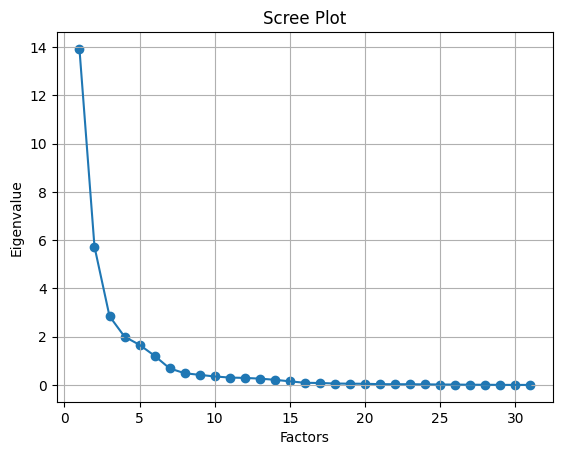

In [16]:
# Show the correlation matrix
import matplotlib.pyplot as plt
fa = FactorAnalyzer(5,rotation=None)
fa.fit(df)
ev,v = fa.get_eigenvalues()
print(ev)
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(120.7222222222222, 0.5, 'Factor Names')

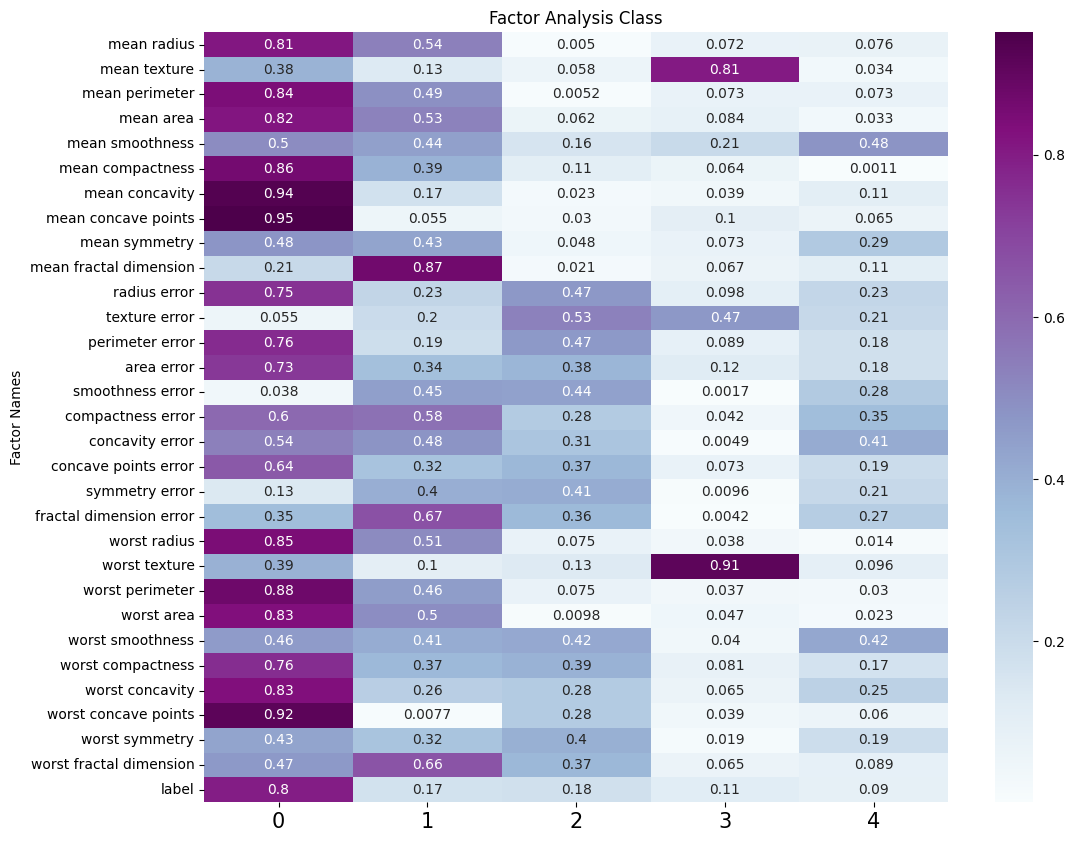

In [18]:
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis Class",fontsize=12)
ax.set_ylabel("Factor Names")